# Project 01: How fast do I need to speed to escape the police?
**Name:** Aaron Kraft

## Introduction: my research question and some initial assumptions

How fast do I need to drive to escape a police car under the following conditions?

1.   The police car starts at rest and begins accelerating 5 seconds after I pass them. This seems like a reasonable amount of time to notice me speed by, to turn on the police car, and for them to start driving.
2.   The police car accelerate from 0-60 mph is 6 seconds and maintain that acceleration up to a maximum speed of 140 mph [1]
3.   If the police car can't catch me within 2 minutes, they give up (Grand Theft Auto Rules [2])

## The physics simulation

My speed will be constant, so my equation of motion is simply: $$x_{Aaron}=v_{Aaron}t$$. The cop will have two equations of motion, the first will describe their acceleration and the second will describe once they reach their final velocity:

$$x_{cop,1} = \frac{1}{2}at^2$$
$$x_{cop,2} = x_{max}+v_{max}t$$

Here, $x_{max}$ is the position when the cop first reaches the maximum velocity and $v_{max}$ is the maximum velocity. In Euler's method this will be easy to model since I will simply change the equation for acceleration once the velocity hits the maximum.

Below is my code for the simulation where I used Euler's method to model the motion of my car and the police car. I set the initial time and position to the point when I pass the cop and they start accelerating. I used a while loop instead of a for loop because I find it a bit easier to understand the end condition. Also, my speed is constant, but I need a list `my_speeds` so that I can make graphs with speeds.

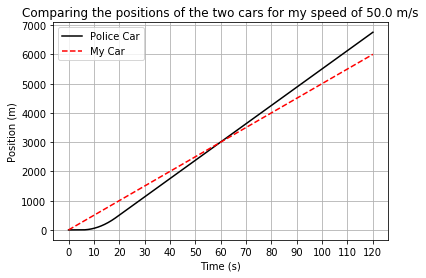

In [1]:
import matplotlib.pyplot as plt

# Given data:
v_me = 50  # m/s - Testing for one speed
a = 4.6   # m/s^2 - Acceleration of police car, ~ zero to 60 in 6 seconds
dt = 0.1  # s - Small time step for Euler's method
duration = 120 # s - Time before the cop gives up
vp_max = 62.5 # m/s - about 225 km/h (140 mph)

# Initial states
t = 0
vp = 0  # m/s - police car speed
sp = 0  # m - instantaneous position of the police car
s_me = 0  # m - instantaneous position of the speeding car

# Create the lists we will fill
times = [t]
police_speeds = [vp]
police_positions = [sp]
my_speeds = [v_me]
my_positions = [s_me]

while times[-1] <= duration:

    # Get most recent kinematic quantities
    t_last = times[-1]
    vp_last = police_speeds[-1]
    sp_last = police_positions[-1]
    v_me_last = my_speeds[-1]
    s_me_last = my_positions[-1]

    # Determine speed of the police car
    if t_last < 5:  # police car starts after 5 seconds
        vp_new = 0
    elif vp_new < vp_max:  # police car accelerates until it gets to max speed
        vp_new = vp_last + a * dt
    else:  # police car goes on at constant speed
        vp_new = vp_max

    # Update positions of the cars
    sp_new = sp_last + vp_last * dt
    s_me_new = s_me_last + v_me * dt

    # Update time
    t_new = t_last + dt

    times.append(t_new)
    police_speeds.append(vp_new)
    police_positions.append(sp_new)
    my_speeds.append(v_me_last)
    my_positions.append(s_me_new)

# Plot the results
plt.plot(times, police_positions, label='Police Car', color='black')
plt.plot(times, my_positions, label='My Car', color='red', linestyle='--')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f"Comparing the positions of the two cars for my speed of {v_me:.1f} m/s")
plt.legend()
plt.grid(True)
plt.xticks(range(0, int(duration) + 1, 10))
plt.show()

The graph above shows how the simulation works for travelling at 50 m/s. Here the police car catches up to me in 60 seconds, so I don't escape. In my investigation I will also look at speeds higher than 50 m/s.

## Investigation of varying my speed

In this section I look at a range of speeds from 50 to 60 m/s to figure out how fast I need to be driving to escape the police.

In my code below I loop over these speeds and

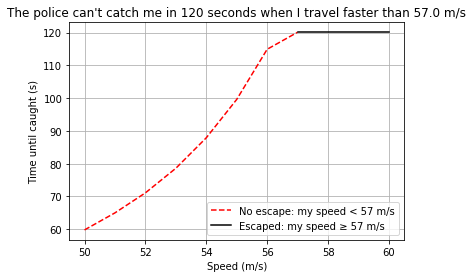

In [2]:
import matplotlib.pyplot as plt

# Given data:
vs_list = [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]  # m/s - My speed
a = 4.6   # m/s^2 - Acceleration of police car, about zero to 60 in 6 seconds
dt = 0.1  # s - Small time step for Euler's method
duration = 120  # s - Time before the cop gives up

escaped = False
caught = []

for v_me in vs_list:
    # Initial states
    t = 0
    vp = 0  # m/s - Police car speed
    vp_max = 62.5  # m/s - About 225 km/h (140 mph)
    sp = 0  # m - Instantaneous position of the police car
    s_me = 0  # m - Instantaneous position of the speeding car

    # Create the lists we will fill
    times = [t]
    police_speeds = [vp]
    police_positions = [sp]
    my_positions = [s_me]

    while times[-1] <= duration:

        # Get most recent kinematic quantities
        t_last = times[-1]
        vp_last = police_speeds[-1]
        sp_last = police_positions[-1]
        s_me_last = my_positions[-1]

        # Calculate position of the speeding car
        s_me_new = s_me_last + v_me * dt

        # Determine speed of the police car
        if t_last < 5:  # Police car starts after 5 seconds
            vp_new = 0
        elif vp_last < vp_max:  # Police car accelerates until max speed
            vp_new = vp_last + a * dt
        else:  # Police car goes on at constant speed
            vp_new = vp_max

        # Update position of the police car
        sp_new = sp_last + vp_last * dt

        # Update time
        t_new = t_last + dt

        # Append new values to the lists
        times.append(t_new)
        police_speeds.append(vp_new)
        police_positions.append(sp_new)
        my_positions.append(s_me_new)

    # Check when the police car catches up
    for index, (sp_pos, me_pos) in enumerate(zip(police_positions, my_positions)):
        if sp_pos > me_pos:
            break

    # Store the current time when the while loop above ended
    caught.append(times[index])

    # Check for the lowest escape speed
    if times[index] > duration and not escaped:
        escaped = True
        my_lowest_escape = my_positions
        cop_lowest_escape = police_positions
        v_lowest_escape = v_me

# Split the vs_list and caught based on v_lowest_escape
# I had help from ChatGPT to figure this out
vs_below_escape = [v for v in vs_list if v <= v_lowest_escape]
caught_below_escape = [t for v, t in zip(vs_list, caught) if v <= v_lowest_escape]
vs_above_escape = [v for v in vs_list if v >= v_lowest_escape]
caught_above_escape = [t for v, t in zip(vs_list, caught) if v >= v_lowest_escape]

# Plot results
plt.plot(vs_below_escape, caught_below_escape, 
         label=f'No escape: my speed < {v_lowest_escape} m/s', color='red', linestyle='--')
plt.plot(vs_above_escape, caught_above_escape, label=f'Escaped: my speed ≥ {v_lowest_escape} m/s', color='black')
plt.xlabel('Speed (m/s)')
plt.ylabel('Time until caught (s)')
plt.title(f"The police can't catch me in 120 seconds when I travel faster than {v_lowest_escape:.1f} m/s")
plt.grid(True)
plt.legend()
plt.show()


## Conclusion

This simulation shows that I have to go really fast to escape the police within two minutes. Anything less than 57 m/s (204.4 km/h), and the cop can catch up. The first plot shows the position vs time graph for the lowest speed when I escape the police. I use a plot of the different speeds that I investigated to see that they don't catch up in 120 seconds after I get to 57 m/s but they can easily catch up before that.

Of course this model of police behaviour is not entirely accurate. It's hard to imagine that outside of grand theft auto rules, the police would stop chasing me after 2 minutes, especially if they were that close. But still, this is a good piece of evidence that if you want to avoid the police, you probably have to drive faster than them. A-5 second head start is not going to be enough.

I think my next steps in this project would be to incorporate the acceleration of my car into the simulation, so that when I notice the police car start to accelerate that I would also accelerate. I could redo this investigation with differention initial and maximum speeds for my car.

## References

1: https://stillwater.furymotors.com/blogs/4923/how-fast-is-the-dodge-charger-police-car/

2: https://en.wikipedia.org/wiki/Grand_Theft_Auto

## Appendix 1: Code validation

### A1.1: Comparison of simulation results with by-hand calculations

When I was making the simulation print out the values to check my by-hand calculations, I couldn't figure out why my values for the final position of my car were coming out weird from the code since the calculation is very straight-forward. For example x = 56m/s*120s = 6,720m. Finally I figured out that the floating point number issue was showing up for my times list and that t=120s was actually just a tiny bit smaller than 120s so the simulation is actually running to 120.1 s. To correct for this, I look at times[-2] to compare to my by-hand calculations.

Below you can see that my by-hand calculations for my car match the simulation with x(56m/s) = 6,720m and x(57m/s) = 6,840m.

The numbers for the police car didn't match in the third digit so I changed my dt to 0.005s and that made the numbers match much more closely so I think if I kept making dt smaller, the numbers would match even more closely.  My calculation is x = 6762.9m. The simulation when using dt = 0.005s gives 6762.4m.

![by hand work](https://i.ibb.co/vsxhd5q/IMG-0267-small.jpg)

In [12]:
### For v_me = 56 m/s

# Given data:
v_me = 56  # m/s - Testing for one speed
a = 4.6   # m/s^2 - Acceleration of police car, ~ zero to 60 in 6 seconds
dt = 0.005  # s - Small time step for Euler's method
duration = 120 # s - Time before the cop gives up
vp_max = 62.5 # m/s - about 225 km/h (140 mph)

# Initial states
t = 0
vp = 0  # m/s - police car speed
sp = 0  # m - instantaneous position of the police car
s_me = 0  # m - instantaneous position of the speeding car

# Create the lists we will fill
times = [t]
police_speeds = [vp]
police_positions = [sp]
my_speeds = [v_me]
my_positions = [s_me]

while times[-1] <= duration:

    # Get most recent kinematic quantities
    t_last = times[-1]
    vp_last = police_speeds[-1]
    sp_last = police_positions[-1]
    v_me_last = my_speeds[-1]
    s_me_last = my_positions[-1]

    # Determine speed of the police car
    if t_last < 5:  # police car starts after 5 seconds
        vp_new = 0
    elif vp_last < vp_max:  # police car accelerates until it gets to max speed
        vp_new = vp_last + a * dt
    else:  # police car goes on at constant speed
        vp_new = vp_max

    # Update positions of the cars
    sp_new = sp_last + vp_last * dt
    s_me_new = s_me_last + v_me * dt

    # Update time
    t_new = t_last + dt

    times.append(t_new)
    police_speeds.append(vp_new)
    police_positions.append(sp_new)
    my_speeds.append(v_me_last)
    my_positions.append(s_me_new)

print(f"For my speed {v_me} m/s: at time {times[-2]:.2f} s,"
      f"  my final position {my_positions[-2]:.2f};  police car final position {police_positions[-2]:.2f}")

### For v_me = 56 m/s

# Given data:
v_me = 57  # m/s - Testing for one speed
a = 4.6   # m/s^2 - Acceleration of police car, ~ zero to 60 in 6 seconds
dt = 0.005  # s - Small time step for Euler's method
duration = 120 # s - Time before the cop gives up
vp_max = 62.5 # m/s - about 225 km/h (140 mph)

# Initial states
t = 0
vp = 0  # m/s - police car speed
sp = 0  # m - instantaneous position of the police car
s_me = 0  # m - instantaneous position of the speeding car

# Create the lists we will fill
times = [t]
police_speeds = [vp]
police_positions = [sp]
my_speeds = [v_me]
my_positions = [s_me]

while times[-1] <= duration:

    # Get most recent kinematic quantities
    t_last = times[-1]
    vp_last = police_speeds[-1]
    sp_last = police_positions[-1]
    v_me_last = my_speeds[-1]
    s_me_last = my_positions[-1]

    # Determine speed of the police car
    if t_last < 5:  # police car starts after 5 seconds
        vp_new = 0
    elif vp_last < vp_max:  # police car accelerates until it gets to max speed
        vp_new = vp_last + a * dt
    else:  # police car goes on at constant speed
        vp_new = vp_max

    # Update positions of the cars
    sp_new = sp_last + vp_last * dt
    s_me_new = s_me_last + v_me * dt

    # Update time
    t_new = t_last + dt

    times.append(t_new)
    police_speeds.append(vp_new)
    police_positions.append(sp_new)
    my_speeds.append(v_me_last)
    my_positions.append(s_me_new)

print(f"For my speed {v_me} m/s: at time {times[-2]:.2f} s,"
      f"  my final position {my_positions[-2]:.2f};  police car final position {police_positions[-2]:.2f}")
print(f"My final time was {times[-1]} s")

For my speed 56 m/s: at time 120.00 s,  my final position 6720.00;  police car final position 6762.44
For my speed 57 m/s: at time 120.00 s,  my final position 6840.00;  police car final position 6762.44
My final time was 120.00499999996335 s


### A1.2:

To back up the information that I double-checked with my by-hand calculations, I also made a different version of the first plot that I put in the project and included one that shows speeds vs time. The shapes of my position graphs all make sense based on the shapes of my speed graphs. My car has constant speed so we expect that to be the slope of my car's position. When the police car is accelerating it shows a slope of 4.6 m/s/s on the speed graph from 5 seconds to almost 20 seconds. During this time on the position graph we see that it looks like parabolic curve like we usually see with constant acceleration.

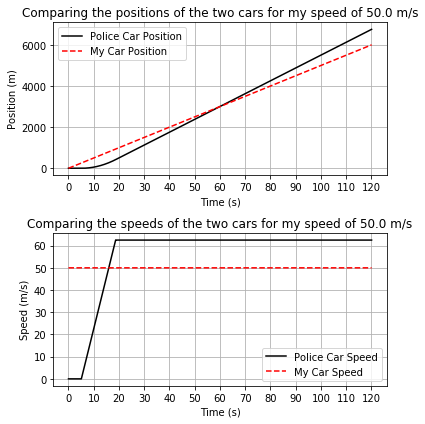

In [4]:
import matplotlib.pyplot as plt

# Given data:
v_me = 50  # m/s - Testing for one speed
a = 4.6   # m/s^2 - Acceleration of police car, ~ zero to 60 in 6 seconds
dt = 0.1  # s - Small time step for Euler's method
duration = 120 # s - Time before the cop gives up
vp_max = 62.5 # m/s - about 225 km/h (140 mph)

# Initial states
t = 0
vp = 0  # m/s - police car speed
sp = 0  # m - instantaneous position of the police car
s_me = 0  # m - instantaneous position of the speeding car

# Create the lists we will fill
times = [t]
police_speeds = [vp]
police_positions = [sp]
my_speeds = [v_me]
my_positions = [s_me]

while times[-1] <= duration:

    # Get most recent kinematic quantities
    t_last = times[-1]
    vp_last = police_speeds[-1]
    sp_last = police_positions[-1]
    v_me_last = my_speeds[-1]
    s_me_last = my_positions[-1]

    # Determine speed of the police car
    if t_last < 5:  # police car starts after 5 seconds
        vp_new = 0
    elif vp_last < vp_max:  # police car accelerates until it gets to max speed
        vp_new = vp_last + a * dt
    else:  # police car goes on at constant speed
        vp_new = vp_max

    # Update positions of the cars
    sp_new = sp_last + vp_last * dt
    s_me_new = s_me_last + v_me * dt

    # Update time
    t_new = t_last + dt

    times.append(t_new)
    police_speeds.append(vp_new)
    police_positions.append(sp_new)
    my_speeds.append(v_me_last)
    my_positions.append(s_me_new)

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(6, 6))

# First subplot: positions of both cars
ax[0].plot(times, police_positions, label='Police Car Position', color='black')
ax[0].plot(times, my_positions, label='My Car Position', color='red', linestyle='--')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Position (m)')
ax[0].set_title(f"Comparing the positions of the two cars for my speed of {v_me:.1f} m/s")
ax[0].legend()
ax[0].grid(True)
ax[0].set_xticks(range(0, int(duration) + 1, 10))

# Second subplot: speeds of both cars
ax[1].plot(times, police_speeds, label='Police Car Speed', color='black')
ax[1].plot(times, my_speeds, label='My Car Speed', color='red', linestyle='--')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Speed (m/s)')
ax[1].set_title(f"Comparing the speeds of the two cars for my speed of {v_me:.1f} m/s")
ax[1].legend()
ax[1].grid(True)
ax[1].set_xticks(range(0, int(duration) + 1, 10))

plt.tight_layout()
plt.show()


### A1.3:

## Appendix 2: Reflection questions

### Reflection 1: Coding Approaches (A)
*(How well did you apply and extend your coding knowledge in this project? Consider steps you took to make the code more efficient, readable and/or concise. Discuss any new-to-you coding techniques, functions or python packages that you learned how to use. Reflect on any unforeseen coding challenges you faced in completing this project.)*

Honestly I didn't extend my coding knowledge very much in this project beyond learning how to use the zip function. I was surprised how long it took me to go from a working simulation like I show in "The Physics Simulation" to one that allowed me to loop over my different speeds and store the information I wanted. I made a lot of small mistakes when trying to do this.

### Reflection 2: Coding Approaches (B)
*(Highlight an aspect of your code that you feel you did particularily well. Discuss an aspect of your code that would benefit the most from further effort.)*

Once I got the outside for loop to work and let me iterate over vs_list, I felt like this was an effective approach to do this. In writing this, I realize that I probably could have done a better job using descriptive variable names. I initially made some short variable names and then half-way through working on the project started updating some of them to be more descriptive. The problem was that every time I tried to update my variable names, it would cause new errors and I got tired of trying to fix the errors.

### Reflection 3: Simulation phyiscs and investigation (A)
*(How well did you apply and extend your physical modelling and scientific investigation skills in this project? Consider the phase space you chose to explore and how throroughly you explored it. Consider how you translated physics into code and if appropriate any new physics you learned or developed a more thorough understanding of.)*

The physics in this simulation is really simple and I don't think my investigation is very complex. It would have been a better project if I varied more variables.

### Reflection 4: Simulation phyiscs and investigation (B)
*(Highlight something you feel you did particularily well in terms of the context of your simulation, the physical modelling that you did or the investigation you performed. Discuss an aspect of these dimensions of your project that would benefit the most from further effort.)*

I like the story that I built for the simulation and was happy that I could use video game logic in a sort of real world situation. Other than investigating more variables, I want to better understand why my second graph has the sharp bend from 56 to 57 m/s.

### Reflection 5: Effectiveness of your communication
*(Highlight something you feel you did particularily well in your visualizations or written communication. Discuss an aspect of your visualizations or written communication that would benefit the most from further effort.)*

I really like my second graph. I used f-strings in my legend and title so that if I changed any of the variables, everything would update. I also think the graph communicates when I first escape really well because of the change in the graph and the legend.

I'm a bit worried that my project write-up is too short.

## Appendix 3: Referee report

| Criteria                    | Ratings            | Comments   |
|:---|:--|:---|
| Simulation and simulation physics | Revision required | Some of the assumptions are clearly explained but the realism of the top speed of your car is not established. Because the simulation is based in kinematics, extending the physics will be more about making the investigation itself more ambitious.   |
| Coding                      | No revision required | A reasonable effort was put in to use variables in many aspects of the plots (legends, titles) so that changes to the parameters of the simulation will dynamically update the graphs. Assuming you will extend yourself a bit more on the coding side when you extend your investigation further, the coding practices should meet expectations. |
| Communication of investigation | Revision required | Given the quality of investigation, the research question is asked, answered, and supported. Revision is needed on plot 1, which is supposed to be a multi-panel plot showing the behavior of the simulation. Your multi-panel plot in A.2 should have been what you used here. Overall, your plots could have used more description of what the reader is supposed to take away. |
| Quality of investigation     | Revision required | The code validation steps were well done. The investigation itself is not ambitious enough. The next steps you described are of an ambition level that should have been in the original project.  |
| Reflection                   | Revision recommended | Overall, the reflections demonstrate reasonable effort. If possible, it would have been good to better communicate which aspects of the project were effortful.    |
| **Editorial Decision**           | **Major Revisions**             | Overall, this project needs a bit more ambition to bring it up to Publish levels.      |
